# Graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from pathlib import Path

mpl.rcParams.update(rcParams)

In [2]:
def load(filename: str):
    return pd.read_csv(filename, header=None)

In [3]:
def gen_graphs(filename: str):
    data = pd.read_csv(filename, header=None)
    plt.scatter(data[0], data[1], marker="s", s=2)
    plt.xlabel(r"$V_x$ [\si{\volt}]")
    plt.ylabel(r"$V_y$ [\si{\volt}]")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"../figures/{Path(filename).stem}.pdf")

In [4]:
from glob import glob

files = glob("../data/*.csv")
for file in files:
    gen_graphs(file)
    plt.close()

## Combined

In [5]:
bloc = load("../data/G1-phywe-avec-bloc.csv")
smoll = load("../data/G1-phywe-avec-bloc-smoll.csv")
smoller = load("../data/G1-phywe-avec-bloc-smoller.csv")

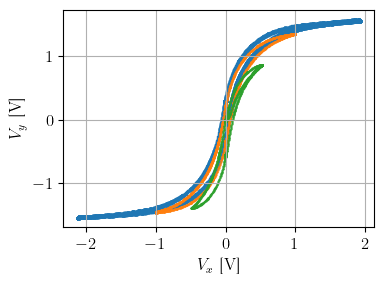

In [6]:
plt.scatter(bloc[0], bloc[1], marker='s', s=2)
plt.scatter(smoll[0], smoll[1], marker='.', s=1)
plt.scatter(smoller[0], smoller[1], marker='.', s=1)
plt.xlabel(r"$V_x$ [\si{\volt}]")
plt.ylabel(r"$V_y$ [\si{\volt}]")
plt.grid()
plt.tight_layout()
plt.savefig("../figures/phywe_autres_cycles.pdf")

In [7]:
horz = load("../data/G1-phywe-avec-bloc-horiz.csv")
vert = load("../data/G1-phywe-avec-bloc-penche.csv")

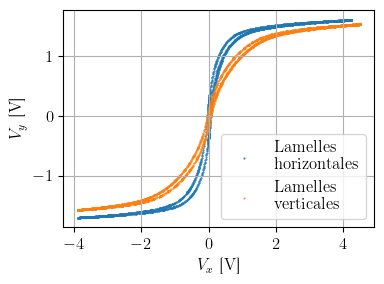

In [8]:
plt.scatter(horz[0], horz[1], marker='.', s=1, label='Lamelles\nhorizontales')
plt.scatter(vert[0], vert[1], marker='.', s=1, label='Lamelles\nverticales')
plt.xlabel(r"$V_x$ [\si{\volt}]")
plt.ylabel(r"$V_y$ [\si{\volt}]")
plt.grid()
plt.legend()
plt.tight_layout()
# plt.xlim((-3,3))
plt.savefig("../figures/vertical_vs_horizontal.pdf")

## Separateurs amagnetiques

In [9]:
amag1 = load("../data/G1-phywe-amagn-1.csv")
amag2 = load("../data/G1-phywe-amagn-2.csv")
amag4 = load("../data/G1-phywe-amagn-4.csv")
amag6 = load("../data/G1-phywe-amagn-6.csv")

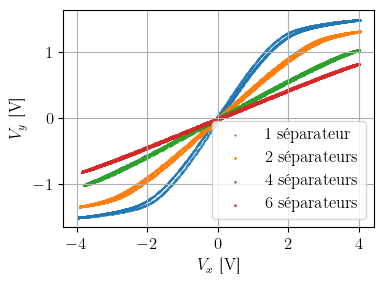

In [10]:
idx1 = np.random.random(amag1[0].shape) > 0.0
idx2 = np.random.random(amag2[0].shape) > 0.0
idx4 = np.random.random(amag4[0].shape) > 0.0
idx6 = np.random.random(amag6[0].shape) > 0.0
plt.scatter(amag1[0][idx1], amag1[1][idx1], marker='.', s=1, label='1 séparateur')
plt.scatter(amag2[0][idx2], amag2[1][idx2], marker='x', s=1, label='2 séparateurs')
plt.scatter(amag4[0][idx4], amag4[1][idx4], marker='v', s=1, label='4 séparateurs')
plt.scatter(amag6[0][idx6], amag6[1][idx6], marker='^', s=1, label='6 séparateurs')
plt.xlabel(r"$V_x$ [\si{\volt}]")
plt.ylabel(r"$V_y$ [\si{\volt}]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("../figures/separateurs_amagnetique.pdf")